# Aula 4 - Mínimos Quadrados e Ajustes de Curvas

Quero $y = β_{0} + β_{1}x | y_{i} ≈ β_{0} + β_{1}x_{i}$ para y a reta que mais aproxima os dados de acordo com o ajuste vertical deles.

$$E(β_{0}, β_{1}) = \sum_{i=1}^{n}(y_{i} - (β_{0} + β_{1}x_{i})^2$$

<u>Otimização:</u> Quero o mínimo de Erro $E(β_{0}, β_{1})$

=======================================================================================================================
$$\frac{\partial E}{\partial β_{0}} = \frac{1}{2}\sum_{i=1}^{n}2(y_{i} - β_{0} - β_{1}x_{i})$$
$$\sum_{i=1}^{n}(β_{0} + β_{1}x_{i} - y_{i}) = 0$$
=======================================================================================================================
$$\frac{\partial E}{\partial β_{1}} = \frac{1}{2}\sum_{i=1}^{n}2(y_{i} - β_{0} - β_{1}x_{i})$$
$$\sum_{i=1}^{n}(β_{0}x_{i} + β_{1}x_{i}^2 - x_{i}y_{i}) = 0$$
=======================================================================================================================
$$β_{0}\sum 1 + β_{1}\sum x_{i} = \sum y_{i}$$
$$β_{0}\sum x_{i} + β_{1}\sum x_{i}^2 = \sum x_{i}y_{i}$$
=======================================================================================================================
$$M = \begin{bmatrix}
    m_{11} & m_{12}\\
    m_{21} & m_{22}
    \end{bmatrix}
    , \hspace{8px}c = \begin{bmatrix}
    c_{1} \\ c_{2} \end{bmatrix}
    , \hspace{8px}β = \begin{bmatrix}
    β_{0} \\ β_{1} \end{bmatrix}$$
=======================================================================================================================
## $$Mc = β$$

In [1]:
using Plots
gr(size=(600, 400))
plot(rand(3), rand(3))
scatter!(rand(3), rand(3))
nothing

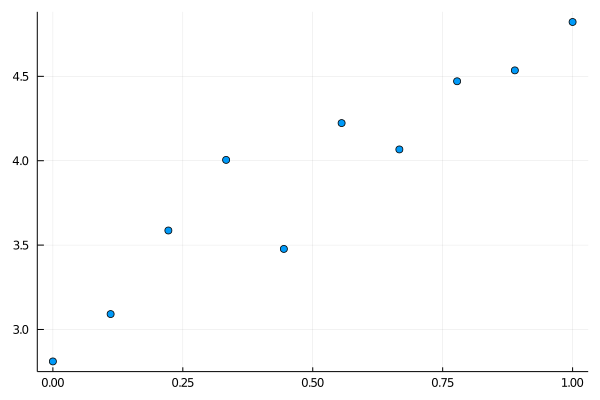

In [2]:
n = 10
x = range(0, 1, length = n)
y = 2x .+ 3 + randn(n) * 0.2

scatter(x, y, leg = false)

In [3]:
E(β₀, β₁) = sum((y[i] - β₀ - β₁ * x[i])^2 for i = 1:n) / 2

E (generic function with 1 method)

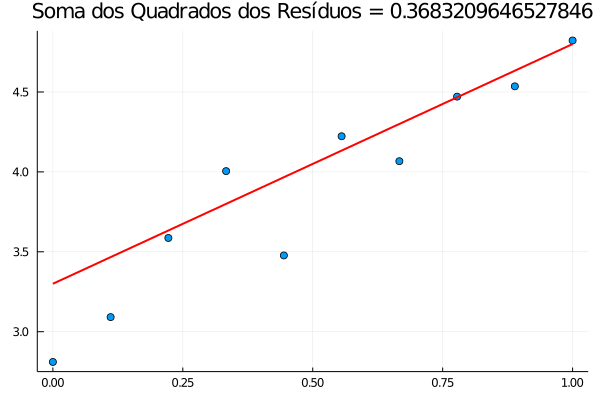

In [4]:
β₀ = 3.3
β₁ = 1.5

scatter(x, y, leg = false)
plot!(x -> β₀ + β₁ * x, extrema(x)..., c=:red, lw=2)
title!("Soma dos Quadrados dos Resíduos = $(E(β₀, β₁))")

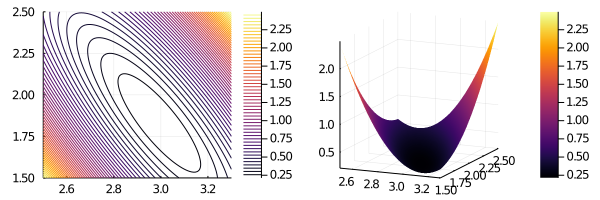

In [5]:
β₀range = range(2.5, 3.3, length = 100)
β₁range = range(1.5, 2.5, length = 100)
p = contour(β₀range, β₁range, E, levels = 50, layout = (1, 2), size = (600, 200))
surface!(p[2], β₀range, β₁range, E)

In [6]:
M = [n  sum(x); sum(x)  sum(x .^ 2)]
c = [sum(y); sum(x .*y)]

βsol = M \ c

2-element Array{Float64,1}:
 2.99341935463879
 1.8308619310977634

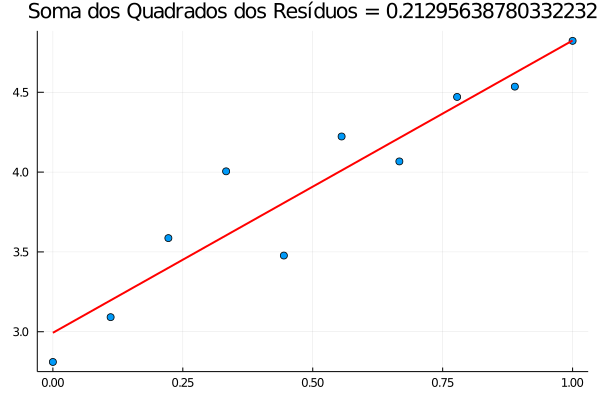

In [7]:
scatter(x, y, leg = false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw = 2)
title!("Soma dos Quadrados dos Resíduos = $(E(βsol[1], βsol[2]))")

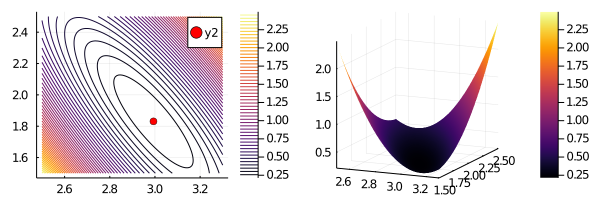

In [8]:
β₀range = range(2.5, 3.3, length = 100)
β₁range = range(1.5, 2.5, length = 100)
p = contour(β₀range, β₁range, E, levels = 50, layout = (1, 2), size = (600, 200))
scatter!(p[1], [βsol[1]], [βsol[2]], c=:red)
surface!(p[2], β₀range, β₁range, E)

### Mínimos Quadrados é tudo do tipo: $\min_{β}\frac{1}{2}\sum(\textrm{afim em β)}^2$

$$Modelo ~ sen(αt) + cos(αt) + cte$$
$$y(t) = β_{1}ϕ_{1}(t) + β_{2}ϕ_{2}(t) + β_{3}ϕ_{3}(t)$$

$$E(β) = \frac{1}{2}\sum_{i=1}^{n}(y_{i} - h(t_{i}))^2$$

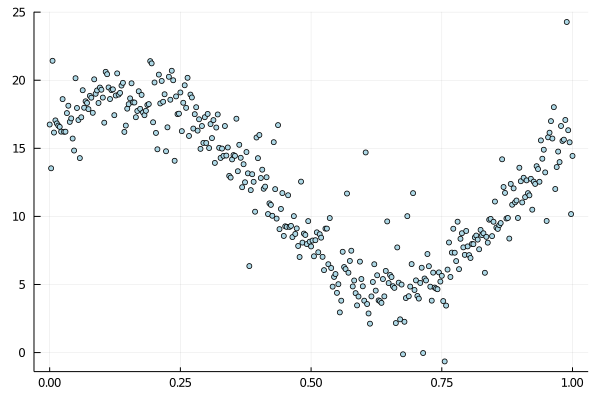

In [9]:
using Random
Random.seed!(0)

# Gerando dados fictícios para teste
n = 365
t = range(0, 1, length = n)

ϕ1(t) = sin(2π * t)
ϕ2(t) = cos(2π * t)
ϕ3(t) = 1.0

y = 6 * ϕ1.(t) + 4 * ϕ2.(t) + 12 * ϕ3.(t) + randn(n)*1.1 +
    [rand() < 0.2 ? randn() * 3.5 : 0.0 for i = 1:n]

scatter(t, y, c=:lightblue, ms = 3, leg = false)

In [10]:
M = zeros(3, 3)
M[1, 1] = sum(ϕ1(t[i]) * ϕ1(t[i]) for i = 1:n)
M[1, 2] = sum(ϕ1(t[i]) * ϕ2(t[i]) for i = 1:n)
M[1, 3] = sum(ϕ1(t[i]) * ϕ3(t[i]) for i = 1:n)
M[2, 1] = M[1, 2]
M[2, 2] = sum(ϕ2(t[i]) * ϕ2(t[i]) for i = 1:n)
M[2, 3] = sum(ϕ2(t[i]) * ϕ3(t[i]) for i = 1:n)
M[3, 1] = M[1, 3]
M[3, 2] = M[2, 3]
M[3, 3] = sum(ϕ3(t[i]) * ϕ3(t[i]) for i = 1:n)

c = zeros(3)
c[1] = sum(y[i] * ϕ1(t[i]) for i = 1:n)
c[2] = sum(y[i] * ϕ2(t[i]) for i = 1:n)
c[3] = sum(y[i] * ϕ3(t[i]) for i = 1:n)

β = M \ c

3-element Array{Float64,1}:
  5.916991316983617
  3.9331924020319957
 11.996596680087135

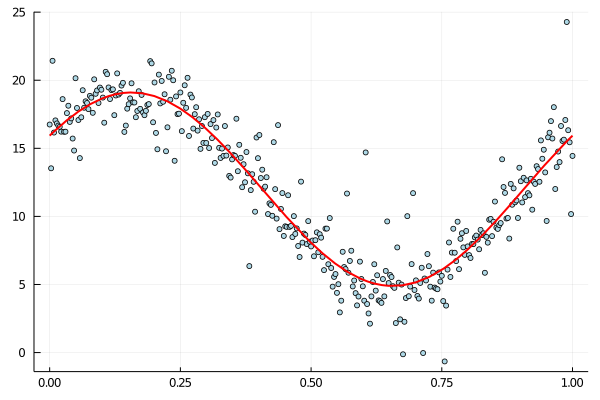

In [11]:
scatter(t, y, c=:lightblue, ms = 3, leg = false)
plot!(t -> β[1] * ϕ1(t) + β[2] * ϕ2(t) + β[3] * ϕ3(t),
    extrema(t)..., c=:red, lw = 2)

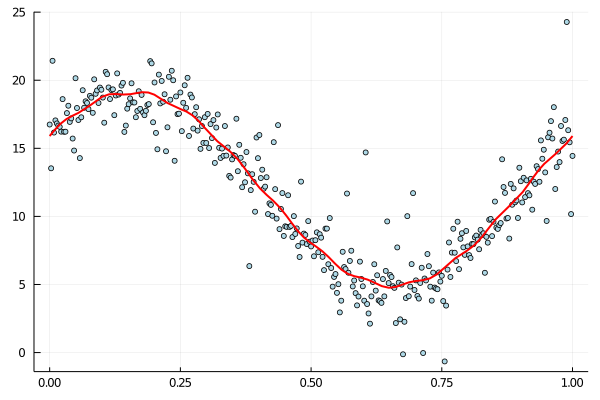

In [12]:
F = [t -> sin(2π * t), t -> cos(2π * t), t -> 1.0,
    t -> sin(12 * 2π * t), t -> cos(12 * 2π * t)
    ]
p = length(F)
M  = zeros(p, p)
c = zeros(p)
for j = 1:p
    for k = 1:p
        M[j, k] = sum(F[j](t[i]) * F[k](t[i]) for i = 1:n)
    end
    c[j] = sum(y[i] * F[j](t[i]) for i = 1:n)
end
β = M \ c
h(t) = sum(F[j](t) * β[j] for j = 1:p)

scatter(t, y, c=:lightblue, ms = 3, leg = false)
plot!(h, extrema(t)..., c=:red, lw = 2)

In [13]:
function quadmin(x, y, F)
    n = length(x)
    p = length(F)
    M  = zeros(p, p)
    c = zeros(p)
    for j = 1:p
        for k = 1:p
            M[j, k] = sum(F[j](x[i]) * F[k](x[i]) for i = 1:n)
        end
        c[j] = sum(y[i] * F[j](x[i]) for i = 1:n)
    end
    β = M \ c
    h(x) = sum(F[j](x) * β[j] for j = 1:p)
    return β, h
end

quadmin (generic function with 1 method)

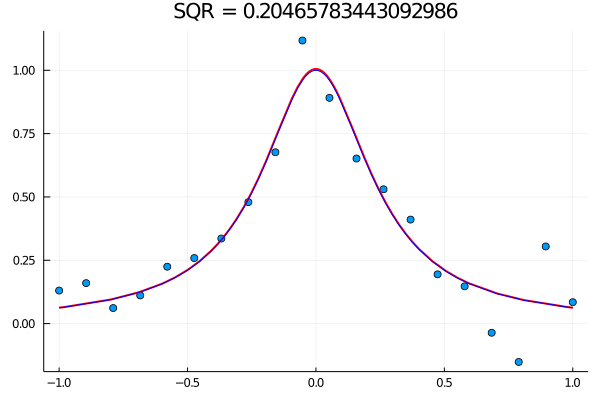

In [14]:
using LinearAlgebra, Random
Random.seed!(0)

n = 20
x = range(-1, 1, length = n)
y = 1 ./ (1 .+ 15 * x.^2) + randn(n) * 0.1
real(x) = 1 ./ (1 .+ 15 * x.^2)

scatter(x, y, leg = false)
"""
F = [x -> 1.0, x -> x, x -> x^2, x -> x^3, x -> x^4, x -> x^5,
    x -> x^6, x -> x^7, x -> x^8, x -> x^10, x -> x^12, x -> x^14,
    x -> x^16, x -> x^18, x -> x^20]
"""
# Pelos dados serem um pouco simétricos, ao acrescentar um grau ímpar, não faz muita diferença
#F = [x -> x^j for j = 0:14]
# Quanto maior a gente coloca o limite de j, mais ele se distancia da reta real, pra tentar passar por todos os pontos
# Causando overfitting
#F = [x -> exp(-k * x^2) for k = 1:20]
F = [x -> 1 / (1 + 15x^2)]
β, modelo = quadmin(x, y, F)
r = y - modelo.(x) # resíduo -> vetor dado pelo dado real menos o predito
SQR = norm(r)^2
plot!(modelo, extrema(x)..., c=:red, lw = 2)
plot!(real, extrema(x)..., c=:blue)
title!("SQR = $SQR")

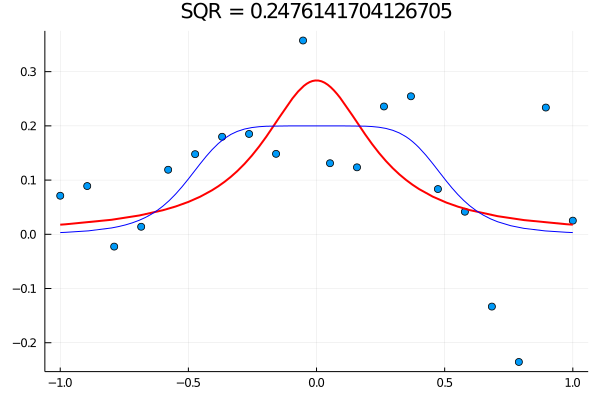

In [16]:
using LinearAlgebra, Random
Random.seed!(0)

n = 20
x = range(-1, 1, length = n)
y = 1 ./ (5 .+ 307 * x.^6) + randn(n) * 0.1
real(x) = 1 ./ (5 .+ 307 * x.^6)

scatter(x, y, leg = false)
"""
F = [x -> 1.0, x -> x, x -> x^2, x -> x^3, x -> x^4, x -> x^5,
    x -> x^6, x -> x^7, x -> x^8, x -> x^10, x -> x^12, x -> x^14,
    x -> x^16, x -> x^18, x -> x^20]
"""
# Pelos dados serem um pouco simétricos, ao acrescentar um grau ímpar, não faz muita diferença
#F = [x -> x^j for j = 0:14]
# Quanto maior a gente coloca o limite de j, mais ele se distancia da reta real, pra tentar passar por todos os pontos
# Causando overfitting
#F = [x -> exp(-k * x^2) for k = 1:20]
F = [x -> 1 / (1 + 15x^2)]
β, modelo = quadmin(x, y, F)
r = y - modelo.(x) # resíduo -> vetor dado pelo dado real menos o predito
SQR = norm(r)^2
plot!(modelo, extrema(x)..., c=:red, lw = 2)
plot!(real, extrema(x)..., c=:blue)
title!("SQR = $SQR")